Optimal control input u(t):
[-9.74679276e+01 -4.86998422e-08 -1.31259970e-09 -2.42597545e-11
  1.52195520e-11  3.11625596e-11  6.31712965e-11  1.24744186e-10
  2.46330076e-10  4.86425065e-10  9.60549868e-10  1.89690375e-09
  3.74674435e-09  7.40606954e-09  1.46820249e-08  2.94355728e-08
  6.15756438e-08  1.49271149e-07  5.43349209e-07  4.73324620e-04]


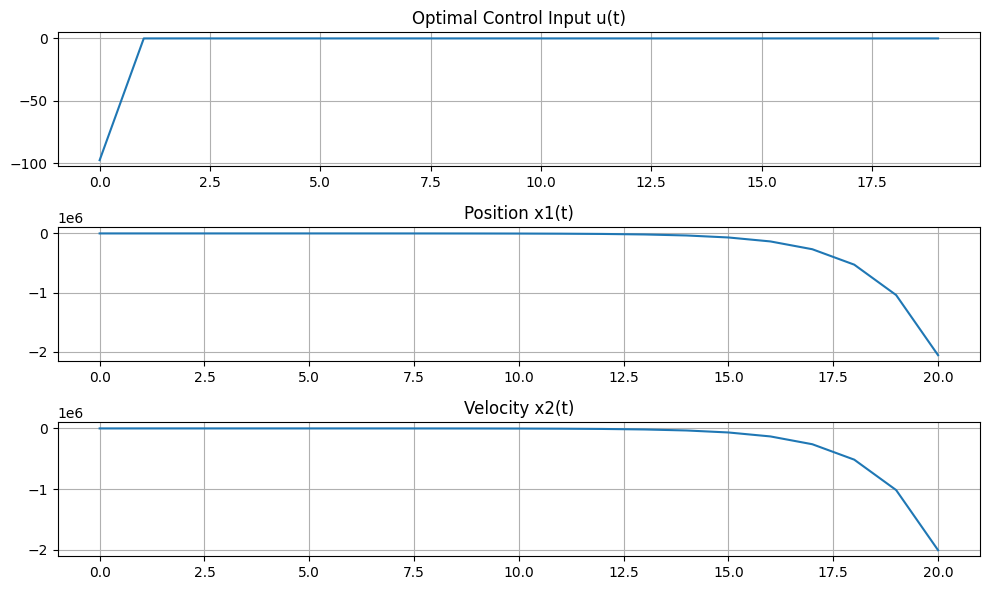

In [3]:
# SECOND WAY: EXPLICIT LP FORMULATION

import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
# Define the problem data
A = np.array([[1, 1], [0.95, 1]])
b = np.array([0, 0.1])
x0 = np.array([0, 0])
x_des = np.array([10, 0])
N = 20

# Define optimization variables
u = cp.Variable(N)

# Define additional variables
t = cp.Variable(N)

# Define the objective function
F = cp.sum(t)

# Define constraints
constraints = [A @ x_des == A @ (cp.sum([np.linalg.matrix_power(A, t) @ b * u[t] for t in range(N)]))]
for i in range(N):
    constraints += [cp.abs(u[i]) <= t[i], 2 * cp.abs(u[i]) - 1 <= t[i]]

# Create the problem instance
problem = cp.Problem(cp.Minimize(F), constraints)

# Solve the problem
problem.solve()

# Extract the solution
u_values = u.value
print("Optimal control input u(t):")
print(u_values)

# Plot the input signal u(t)
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(u_values)
plt.title("Optimal Control Input u(t)")
plt.grid(True)

# Calculate and plot position x1(t) and velocity x2(t)
x_values = [x0]
for i in range(N):
    x_next = A @ x_values[-1] + b * u_values[i]
    x_values.append(x_next)

x_values = np.array(x_values)

plt.subplot(3, 1, 2)
plt.plot(x_values[:, 0])
plt.title("Position x1(t)")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(x_values[:, 1])
plt.title("Velocity x2(t)")
plt.grid(True)

plt.tight_layout()
plt.show()
